# Playground for unknown µ, σ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score

from utils import proportion
from gibbs_sampler import gibbs, multigibbs_gibbs, data_gen, make_param_dict, pred_label, score

# from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = [10,6]

In [2]:
np.random.seed(30)

In [3]:
# mu = [0,4,8,16]
# sigmas = [1,1,2,3]
# phi = [.2,.2,.2,.4]
k = 4
mu = np.random.uniform(low=-50, high=50, size=k)
sigmas = np.random.uniform(low=0.1, high=10, size=k)
phi = proportion(k=k, n=100)
n = 1000
y, class_list = data_gen(mu=mu, sigmas=sigmas, phi=phi, n=n)
x = np.linspace(min(y),max(y), 500)

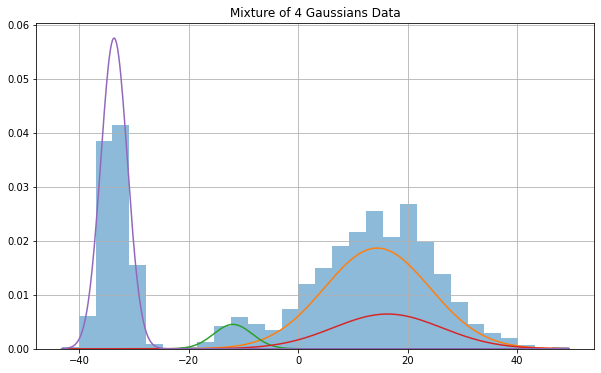

In [4]:
# Create Plot of Data 
plt.hist(y, 30, density=True, alpha=0.5);

for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x) * phi[i])

plt.title(f"Mixture of {k} Gaussians Data")
plt.grid()

In [5]:
N_itter = 2000
burnin = 500

In [6]:
[mu_est, sigma_est, phi_est, z_est, trace] = gibbs(y, N_itter, burnin, k=k)

100%|██████████| 2000/2000 [00:23<00:00, 85.33it/s]


In [7]:
params_dict = make_param_dict(trace=trace)

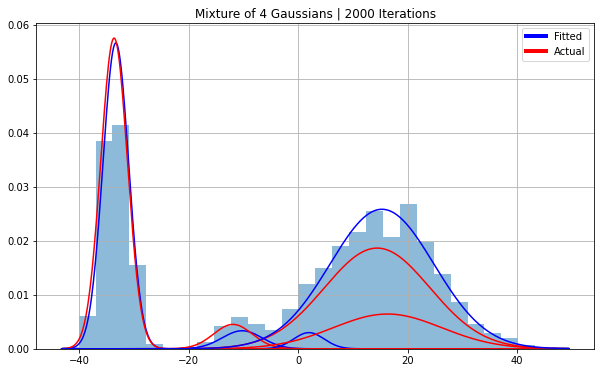

In [8]:
x = np.linspace(min(y), max(y),500)
plt.hist(y, 30, density=True, alpha=0.5);
for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x)*phi[i], color="red")
    plt.plot(x, norm(mu_est[i], sigma_est[i]).pdf(x)*phi_est[0][i], color="blue")
plt.title(f"Mixture of 4 Gaussians | {N_itter} Iterations")
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='Fitted'),
    Line2D([0], [0], color='red', lw=4, label='Actual')
] 
plt.legend(handles=legend_elements, loc="upper right")
plt.grid()
plt.savefig("end_param.png")

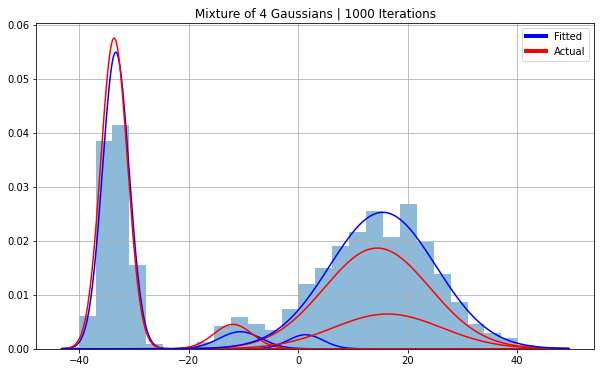

In [9]:
x = np.linspace(min(y), max(y),500)
plt.hist(y, 30, density=True, alpha=0.5);
for i in range(k):
    plt.plot(x, norm(mu[i], sigmas[i]).pdf(x)*phi[i], color="red")
    plt.plot(x, norm(params_dict[f"mu{i}"], params_dict[f"sigma{i}"]).pdf(x)*phi_est[0][i], color="blue")
plt.title(f"Mixture of 4 Gaussians | {n} Iterations")
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='Fitted'),
    Line2D([0], [0], color='red', lw=4, label='Actual')
] 
plt.legend(handles=legend_elements, loc="upper right")
plt.grid()
plt.savefig("mean_param.png")


In [10]:
z_est_mean = pred_label(data=y, params_dict=params_dict)

In [11]:
best_model = multigibbs_gibbs(y, k, N_itter, burnin)

# Gibbsampler with multiple initialisation
multi_z_est = best_model[-2]

# Gibbs with burnin and multiple initialisation
multi_trace = best_model[-1]
multi_param_dict = make_param_dict(trace=multi_trace)
multi_z_est_mean = pred_label(data=y, params_dict=params_dict)


  0%|          | 0/2000 [00:00<?, ?it/s]/home/goirik/Storage/IISER/Sem_8/Semester Project/Code/StdfreeGibbs/gibbs_sampler.py:72: RuntimeWarning: invalid value encountered in true_divide
  pi_i = a / np.sum(a, axis=1)[:,None]
  0%|          | 0/2000 [00:00<?, ?it/s]/home/goirik/Storage/IISER/Sem_8/Semester Project/Code/StdfreeGibbs/gibbs_sampler.py:72: RuntimeWarning: invalid value encountered in true_divide
  pi_i = a / np.sum(a, axis=1)[:,None]



pvals < 0, pvals > 1 or pvals contains NaNs


  0%|          | 0/2000 [00:00<?, ?it/s]


pvals < 0, pvals > 1 or pvals contains NaNs


100%|██████████| 2000/2000 [00:42<00:00, 47.51it/s]
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj

In [12]:
score(y, class_list, z_est)
score(y, class_list, z_est_mean)
score(y, class_list, multi_z_est)
score(y, class_list, multi_z_est_mean)

Rand Index = 0.817
Adjusted Rand Index = 0.633
Silhouette Score = 0.386
Rand Index = 0.802
Adjusted Rand Index = 0.571
Silhouette Score = 0.595
Rand Index = 0.818
Adjusted Rand Index = 0.640
Silhouette Score = 0.625
Rand Index = 0.802
Adjusted Rand Index = 0.571
Silhouette Score = 0.595


/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validati

[0.8022122122122122, 0.5706543096554942, 0.5950464470185121]

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=k)

kmeans.fit(y.reshape(-1,1))

kmean_cat = kmeans.labels_

In [15]:
y.shape

(1000,)

In [16]:
rs = rand_score(class_list, kmean_cat)
ars = adjusted_rand_score(class_list, kmean_cat)
ss = silhouette_score(y.reshape(-1,1), kmean_cat.reshape(-1,1))

print(f"Rand Index = {rs:.3f}")
print(f"Adjusted Rand Index = {ars:.3f}")
print(f"Silhouette Score = {ss:.3f}")

Rand Index = 0.776
Adjusted Rand Index = 0.482
Silhouette Score = 0.649


/home/goirik/.pyenv/versions/3.10.2/envs/semproj/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


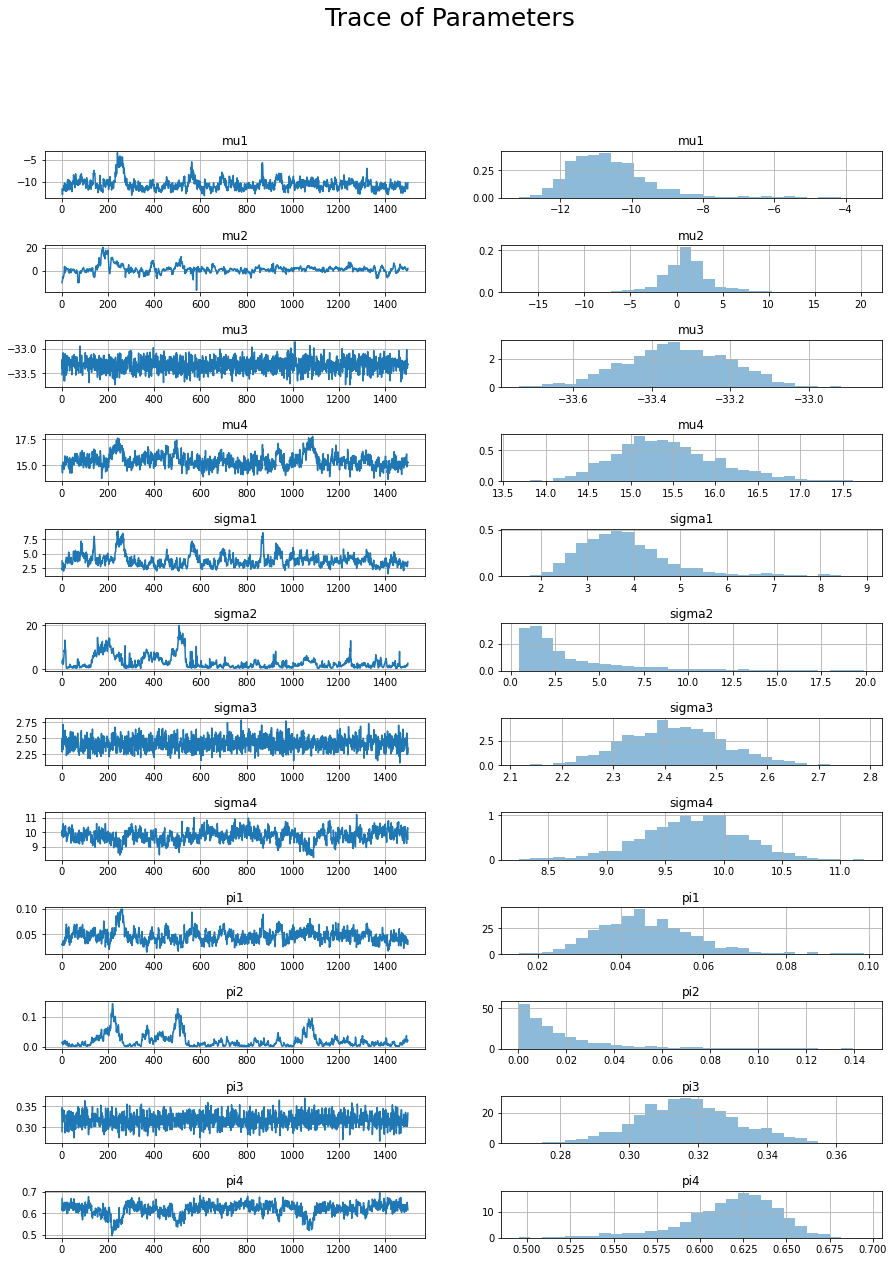

In [17]:
fig, axs = plt.subplots(12,2)
x = range(trace.shape[0])
params = ["mu1", "mu2", "mu3", "mu4", "sigma1", "sigma2", "sigma3", "sigma4", "pi1", "pi2", "pi3", "pi4"]
for i, v in enumerate(params):
    y = trace[:,i]
    axs[i,0].plot(x, y)
    axs[i,0].set_title(v)
    axs[i,1].hist(y, 30, density=True, alpha=0.5);
    axs[i,1].set_title(v)
    axs[i,0].grid()
    axs[i,1].grid()

fig.suptitle("Trace of Parameters", fontsize=25)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=1)
fig.savefig("trace_plot.png")

In [18]:
res

NameError: name 'res' is not defined